
https://www.cs.toronto.edu/~kriz/cifar.html

# Object detection using CNN 

#### Problem Statement 
Indian government has decided to enhance the security in the border areas of China; hence we need to make a model that can detect an object by looking at the image captured by unmanned drone, you will be given a corpus of images that you will use to train the model Current project will include detection of the following 'airplane', 'automobile', 'bird', 'cat', 'deer’,’ dog', 'frog', 'horse', 'ship', 'truck’.

#### Expected Outcome
Create a model that can detect a given object The various objects are as follows 'airplane', 'automobile', 'bird', 'cat', 'deer’,’ dog', 'frog', 'horse', 'ship', 'truck’.


## Importing libraries and loading the dataset

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
classes[0]

'airplane'

In [75]:
def plot_sample (X,y,index):
  plt.figure(figsize = (25,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  # plt.axis('off')

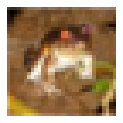

In [15]:
plot_sample(X_train,y_train,0)

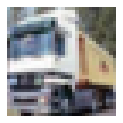

In [16]:
plot_sample(X_train,y_train,1)


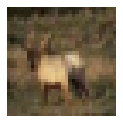

In [17]:
plot_sample(X_train,y_train,3)

## Data Preprocessing

In [18]:
# Data Normalization
X_train =X_train/255
X_test = X_test/255

## Training using simple ann

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10,activation = 'softmax')
])

ann.compile(optimizer = 'sgd',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8147 - accuracy: 0.3530
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6225 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5444 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4840 - accuracy: 0.4743
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4344 - accuracy: 0.4941


In [20]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4649 - accuracy: 0.4779


[1.4648945331573486, 0.4778999984264374]

accuracy on training sample = 49.41%

accuracy on test sample = 47.78%

In [24]:
# printing classification report 
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred ]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.60      0.44      0.51      1000
           1       0.70      0.49      0.58      1000
           2       0.29      0.51      0.37      1000
           3       0.43      0.23      0.30      1000
           4       0.44      0.36      0.40      1000
           5       0.44      0.34      0.38      1000
           6       0.42      0.70      0.53      1000
           7       0.67      0.40      0.50      1000
           8       0.60      0.62      0.61      1000
           9       0.48      0.68      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



## Training using CNN

In [25]:
cnn = models.Sequential([
    #cnn layer 1
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPool2D((2,2)),
    #layer2
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPool2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation= 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [36]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

# usig adam oprtimizer and scc loss function

In [ ]:
cnn.summary()

In [ ]:
histroy=cnn.fit(X_train, y_train, epochs=25)

In [42]:
histroy.params

{'verbose': 1, 'epochs': 25, 'steps': 1563}

In [50]:
histroy.history.keys()

dict_keys(['loss', 'accuracy'])

In [44]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 3.8951 - accuracy: 0.6487


[3.8950867652893066, 0.6486999988555908]

## predictions

In [70]:
y_pred = cnn.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [71]:
print(y_pred[0])

[9.7953468e-12 2.2643218e-16 3.1873035e-12 9.9999976e-01 2.7936438e-16
 6.3691874e-09 1.5028544e-10 1.6143156e-17 3.6124652e-09 1.9396991e-07]


In [68]:
print(y_pred[1])

[3.9856216e-17 1.6509045e-12 1.3219062e-24 1.0814426e-24 0.0000000e+00
 0.0000000e+00 1.7401904e-35 0.0000000e+00 1.0000000e+00 1.2655556e-16]


In [72]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 2, 6]

In [62]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)